In [1]:
import sklearn.datasets

In [2]:
dataset = sklearn.datasets.fetch_california_housing()

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
import pandas as pd

In [7]:
data_df = pd.DataFrame(dataset.data)

In [8]:
data_df.columns = dataset.feature_names

In [9]:
target_df = pd.DataFrame(dataset.target)

In [10]:
target_df.columns = ["target"]

In [11]:
full_df = data_df.join(target_df)

In [12]:
full_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
shuffled_df = full_df.sample(frac=1)

In [15]:
shuffled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
19041,3.3036,26.0,5.453039,1.005525,1002.0,2.767956,38.36,-121.82,2.100
11290,4.3906,36.0,5.862162,0.970270,1018.0,2.751351,33.78,-117.93,2.313
8084,2.5833,23.0,2.557641,1.045576,804.0,2.155496,33.81,-118.19,1.813
14377,6.3331,37.0,6.521994,0.970674,821.0,2.407625,32.73,-117.25,4.000
15654,1.4552,52.0,1.902087,1.059390,1007.0,1.616372,37.79,-122.40,4.500
...,...,...,...,...,...,...,...,...,...
14668,3.6458,35.0,5.341176,0.952941,698.0,2.737255,32.79,-117.13,1.738
2705,4.8750,20.0,6.483871,1.104839,862.0,3.475806,32.85,-115.59,0.908
4580,1.1642,14.0,2.342071,1.117955,2251.0,2.950197,34.06,-118.28,4.000
10186,4.4784,35.0,4.866142,1.005249,1115.0,2.926509,33.87,-117.95,1.852


In [16]:
train_df = shuffled_df[:900]
test_df = shuffled_df[900:1000]

In [17]:
import pycaret.regression as regression

In [18]:
regression.setup(train_df, target="target")

,Description,Value
0,Session id,7434
1,Target,target
2,Target type,Regression
3,Original data shape,"(900, 9)"
4,Transformed data shape,"(900, 9)"
5,Transformed train set shape,"(630, 9)"
6,Transformed test set shape,"(270, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [19]:
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4277,0.3912,0.6193,0.6637,0.1947,0.2632,0.0520
gbr,Gradient Boosting Regressor,0.4323,0.4012,0.6272,0.6612,0.1954,0.2629,0.0250
rf,Random Forest Regressor,0.4502,0.4105,0.6381,0.6495,0.2030,0.2824,0.0550
et,Extra Trees Regressor,0.4451,0.4172,0.6409,0.6470,0.2001,0.2775,0.0350
ada,AdaBoost Regressor,0.5546,0.5098,0.7099,0.5669,0.2363,0.3952,0.0180
dt,Decision Tree Regressor,0.6013,0.7532,0.8643,0.3586,0.2705,0.3502,0.0050
en,Elastic Net,0.6834,0.8102,0.8952,0.3229,0.2882,0.4727,0.0050
br,Bayesian Ridge,0.5442,0.8819,0.8307,0.3069,0.2315,0.3349,0.0070
ridge,Ridge Regression,0.5449,0.8858,0.8316,0.3039,0.2317,0.3351,0.0050
lr,Linear Regression,0.5456,0.8885,0.8326,0.3017,0.2318,0.3355,0.4200


LGBMRegressor(n_jobs=-1, random_state=7434)

In [21]:
lgb_model = regression.create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3172,0.1803,0.4246,0.8554,0.1547,0.2423
1,0.4397,0.4155,0.6446,0.6460,0.2096,0.3053
2,0.4964,0.6094,0.7807,0.5594,0.2233,0.2619
3,0.3745,0.3026,0.5501,0.7259,0.1706,0.2156
4,0.3860,0.3552,0.5960,0.7397,0.1653,0.2022
5,0.5193,0.4910,0.7007,0.4705,0.2324,0.3820
6,0.4592,0.3967,0.6298,0.7237,0.1870,0.2455
7,0.4689,0.3897,0.6243,0.5780,0.2030,0.2834
8,0.3747,0.3774,0.6143,0.6330,0.2056,0.2417


In [22]:
lgb_model

LGBMRegressor(n_jobs=-1, random_state=7434)

In [23]:
tuned_model = regression.tune_model(lgb_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4122,0.2712,0.5208,0.7825,0.1874,0.2965
1,0.4948,0.4763,0.6901,0.5943,0.2184,0.3236
2,0.5309,0.6459,0.8037,0.5330,0.2349,0.2969
3,0.3935,0.3238,0.5691,0.7066,0.1743,0.2170
4,0.4312,0.4450,0.6671,0.6739,0.1889,0.2295
5,0.5202,0.4722,0.6872,0.4907,0.2340,0.3842
6,0.4754,0.4513,0.6718,0.6856,0.1924,0.2412
7,0.4864,0.4165,0.6454,0.5490,0.2141,0.2996
8,0.4267,0.3811,0.6173,0.6294,0.2105,0.2868


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


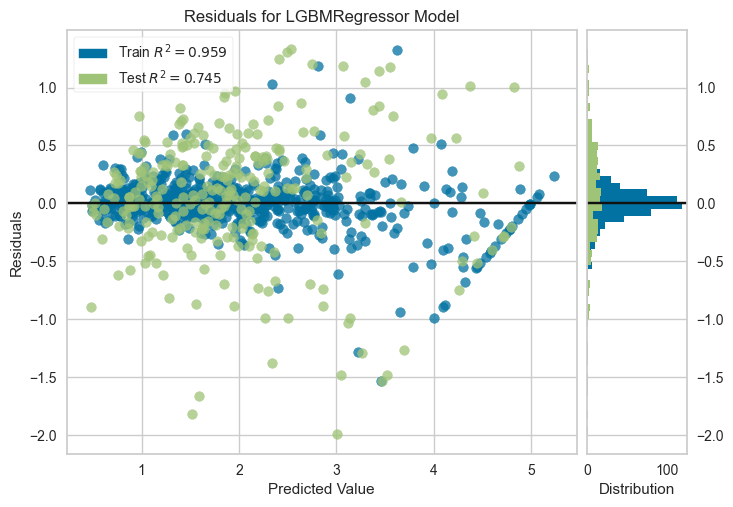

In [24]:
regression.plot_model(lgb_model)

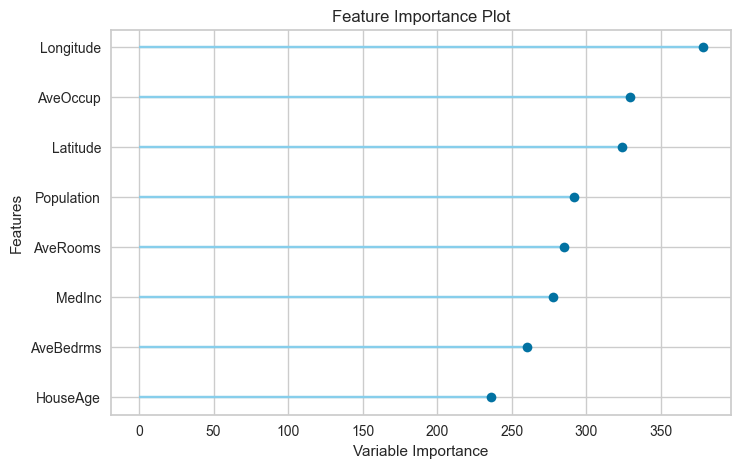

In [25]:
regression.plot_model(lgb_model, plot="feature")

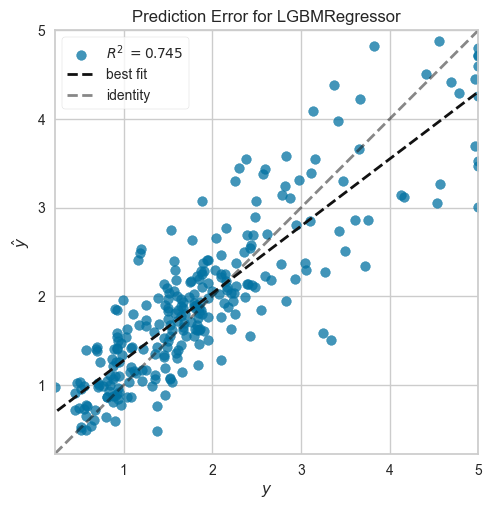

In [28]:
regression.plot_model(lgb_model, plot="error")

In [29]:
final_model = regression.finalize_model(lgb_model)

In [30]:
test_predicted = regression.predict_model(final_model, test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3848,0.2765,0.5259,0.7905,0.1614,0.2146


In [31]:
test_predicted

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,prediction_label
1546,6.3325,19.0,6.748503,1.017964,518.0,3.101796,37.740002,-121.949997,2.500,2.724969
12406,4.7195,6.0,6.745068,1.326584,4571.0,2.373312,33.740002,-116.290001,1.993,2.474896
17637,5.0062,30.0,5.715026,1.116580,2168.0,2.808290,37.270000,-121.910004,2.320,2.695653
3047,1.6944,28.0,4.210027,1.059621,3260.0,4.417344,35.500000,-119.279999,0.586,0.408067
4512,2.1071,52.0,4.228916,0.987952,1036.0,4.160643,34.029999,-118.190002,1.367,1.288211
...,...,...,...,...,...,...,...,...,...,...
10688,3.1679,21.0,5.080963,1.133479,662.0,1.448578,33.619999,-117.720001,1.100,2.842140
18848,1.2700,28.0,4.672973,1.132432,929.0,2.510811,41.410000,-122.370003,0.531,0.751754
15048,6.3191,25.0,7.990338,1.016908,1201.0,2.900966,32.770000,-116.949997,3.034,3.060891
5541,5.6169,35.0,5.308139,0.936047,451.0,2.622093,33.970001,-118.400002,4.112,3.325241
